## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/사교육비조사.csv',encoding='cp949')
df.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


In [3]:
df.isnull().sum()

지역구분코드              0
행정구역시도코드            0
학교급구분코드             0
방과후학교참여여부           0
방과후학교참여시간수          0
EBS교재비              0
사교육참여시간수            0
일반교과사교육시간수          0
예체능사교육시간수           0
사교육비총비용             0
총자녀수                0
학생성적구분코드        39306
부_교육정도코드         4203
모_교육정도코드         3073
부모경제활동코드          345
월평균가구소득코드           0
진학희망고등학교유형코드    36479
dtype: int64

In [4]:
df.shape

(75785, 17)

1.2 데이터의 기술통계량을 출력하세요.

In [5]:
round(df.describe(),2)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.00,75785.00,75785.00,75785.00,75785.00,75785.00,75785.00,75785.00,75785.00,75785.00,75785.00,36479.00,71582.00,72712.00,75440.00,75785.00,39306.00
mean,2.63,27.59,2.31,1.45,2.61,3.60,5.67,4.00,1.61,346.72,2.16,3.18,43.39,41.46,2.29,4.30,1.96
std,0.96,8.54,0.95,0.50,3.76,9.63,6.23,5.36,3.56,407.00,0.72,1.25,11.51,10.59,0.95,2.12,1.58
min,1.00,11.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,8.00,8.00,1.00,1.00,1.00
25%,2.00,22.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,31.00,31.00,1.00,3.00,1.00
50%,3.00,31.00,2.00,1.00,1.00,0.00,4.00,1.00,0.00,236.08,2.00,3.00,41.00,41.00,3.00,4.00,1.00
75%,3.00,35.00,3.00,2.00,4.00,0.00,10.00,7.00,1.67,563.05,3.00,4.00,51.00,51.00,3.00,6.00,3.00
max,4.00,39.00,4.00,2.00,40.00,198.26,82.33,76.00,60.00,5374.16,11.00,5.00,75.00,75.00,4.00,8.00,8.00


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [6]:
df_high = df[df['학교급구분코드']==3]
df_high.shape # 30052개의 데이터가 남아있다

(30052, 17)

In [7]:
# 학교급구분코드 컬럼 삭제
df_high = df_high.drop(['학교급구분코드'],axis=1)
df_high.shape

(30052, 16)

2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [8]:
dt = df_high.drop(['지역구분코드','행정구역시도코드'],axis=1)
dt

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [9]:
dt['방과후학교참여여부'].value_counts()
# 1 : 18498
# 2 : 11554

1    18498
2    11554
Name: 방과후학교참여여부, dtype: int64

In [10]:
dt.loc[df_high["방과후학교참여여부"] == 1, "방과후학교참여여부"] = "참여"
dt.loc[df_high["방과후학교참여여부"] == 2, "방과후학교참여여부"] = "미참여"
dt

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,참여,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,참여,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,미참여,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,미참여,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,미참여,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,미참여,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


dt = pd.get_dummies(dt,drop_first=True)
dt

In [11]:
dt = pd.get_dummies(dt)
dt

,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부_미참여,방과후학교참여여부_참여
4920,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,0,1
4921,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,0,1
4922,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,0,1
4923,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,0,1
4924,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,1,0
75679,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,1,0
75680,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,1,0
75681,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,1,0


2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [12]:
dt["EBS교재비"].value_counts(normalize=True)

0.000000      0.603055
19.684315     0.022428
39.652013     0.018435
11.810589     0.017802
19.826006     0.017603
                ...   
68.107730     0.000033
79.524633     0.000033
158.608052    0.000033
74.149264     0.000033
37.793885     0.000033
Name: EBS교재비, Length: 309, dtype: float64

In [13]:
dt=dt.drop(["EBS교재비"],axis=1)
dt

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부_미참여,방과후학교참여여부_참여
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,0,1
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,0,1
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,1,0
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,1,0
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,1,0
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,1,0


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

In [14]:
plt.rc("font", family = "Malgun Gothic")

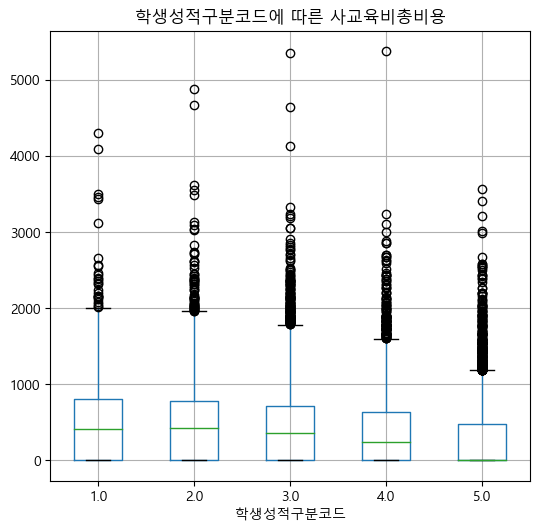

In [15]:
fig,ax = plt.subplots(figsize=(6,6))
dt.boxplot(column=['사교육비총비용'],by="학생성적구분코드", ax=ax)
plt.title("학생성적구분코드에 따른 사교육비총비용")
plt.suptitle('')
plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [16]:
dt['학생성적구분코드'].value_counts(normalize=True)

3.0    0.300546
2.0    0.202283
4.0    0.200319
5.0    0.193431
1.0    0.103421
Name: 학생성적구분코드, dtype: float64

In [17]:
dt['학생성적구분코드'] = dt['학생성적구분코드'].apply(lambda x: "상위" if x in [1.0, 2.0] else x)
dt['학생성적구분코드'] = dt['학생성적구분코드'].apply(lambda x: "하위" if x in [4.0, 5.0] else x)
dt['학생성적구분코드'] = dt['학생성적구분코드'].apply(lambda x: "중위" if x in [3.0] else x)
dt.head(10)

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부_미참여,방과후학교참여여부_참여
4920,0.333333,0.000000,0.000000,0.0,0.000000,1,상위,71.0,61.0,2.0,4,NaN,0,1
4921,0.333333,0.000000,0.000000,0.0,0.000000,2,중위,51.0,51.0,3.0,6,NaN,0,1
4922,0.333333,0.000000,0.000000,0.0,0.000000,2,하위,31.0,41.0,3.0,4,NaN,0,1
4923,0.333333,0.000000,0.000000,0.0,0.000000,2,하위,51.0,51.0,3.0,1,NaN,0,1
4924,0.333333,12.000000,12.000000,0.0,2203.395453,2,하위,71.0,62.0,1.0,8,NaN,0,1
4925,0.333333,13.333333,13.333333,0.0,2518.166232,2,하위,51.0,51.0,3.0,5,NaN,0,1
4926,0.333333,13.333333,13.333333,0.0,871.635714,2,상위,71.0,51.0,1.0,7,NaN,0,1
4927,0.333333,15.333333,15.333333,0.0,1782.891233,2,상위,51.0,51.0,1.0,8,NaN,0,1
4928,0.333333,16.000000,16.000000,0.0,1203.998230,2,상위,51.0,51.0,1.0,8,NaN,0,1
4929,0.333333,22.000000,22.000000,0.0,967.920146,1,중위,NaN,41.0,2.0,8,NaN,0,1


In [18]:
dt = pd.get_dummies(dt)
dt.head(10)

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부_미참여,방과후학교참여여부_참여,학생성적구분코드_상위,학생성적구분코드_중위,학생성적구분코드_하위
4920,0.333333,0.000000,0.000000,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,0,1,1,0,0
4921,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,0,1,0,1,0
4922,0.333333,0.000000,0.000000,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,0,1,0,0,1
4923,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,0,1,0,0,1
4924,0.333333,12.000000,12.000000,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,0,1,0,0,1
4925,0.333333,13.333333,13.333333,0.0,2518.166232,2,51.0,51.0,3.0,5,NaN,0,1,0,0,1
4926,0.333333,13.333333,13.333333,0.0,871.635714,2,71.0,51.0,1.0,7,NaN,0,1,1,0,0
4927,0.333333,15.333333,15.333333,0.0,1782.891233,2,51.0,51.0,1.0,8,NaN,0,1,1,0,0
4928,0.333333,16.000000,16.000000,0.0,1203.998230,2,51.0,51.0,1.0,8,NaN,0,1,1,0,0
4929,0.333333,22.000000,22.000000,0.0,967.920146,1,NaN,41.0,2.0,8,NaN,0,1,0,1,0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: Label Encoding이란 문자열의 고유한 값을 숫자로 바꿔주는 방법이고,
One Hot Encoding은 long-type으로 구성된 변수들을 wide-type으로 목록화하여 변수의 차원을 늘린 후 개별로 해당 컬럼이 맞으면 1 아니면 0의 이진수를 갖는다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [19]:
dt = dt.drop(['방과후학교참여여부_미참여','학생성적구분코드_하위'],axis=1)
dt

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,방과후학교참여여부_참여,학생성적구분코드_상위,학생성적구분코드_중위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,1
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0,0,0
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0,0,0
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0,0,0
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,0,1,0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요. 

A: 다중공선성 문제란 회귀분석에서 독립변수 간에 강한 상관관계가 나타나, 하나의 독립변수의 변화가 다른 독립변수에 영향을 미쳐 결과적으로 모델의 예측 정확도가 낮아지고, 모델이 불안정해질 수 있다. 
One Hot Encoding을 통해 범주형 변수를 dummy variable로 변환할 때, 하나의 범주를 기준으로 삼고 나머지 범주들을 나타내는 dummy variable을 만들기 때문에 이 과정에서 다중공선성 문제가 발생할 수 있다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [20]:
corr_matrix = dt[['사교육참여시간수','일반교과사교육시간수','예체능사교육시간수']].corr()
corr_matrix

,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수
사교육참여시간수,1.000000,0.788419,0.514551
일반교과사교육시간수,0.788419,1.000000,-0.103757
예체능사교육시간수,0.514551,-0.103757,1.000000


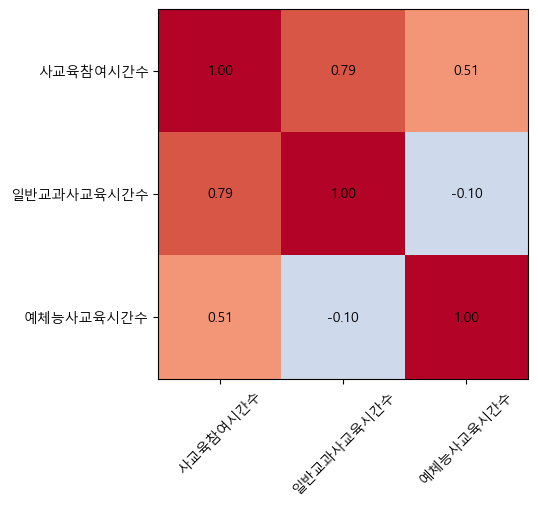

In [21]:
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# x, y 축 눈금 설정
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# 주석 추가
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = "{:.2f}".format(corr_matrix.iloc[i, j])
        plt.annotate(text, xy=(j, i), ha='center', va='center')

# 그래프 출력
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [22]:
dt.shape # (30052,14)
dt.isnull().sum()

방과후학교참여시간수          0
사교육참여시간수            0
일반교과사교육시간수          0
예체능사교육시간수           0
사교육비총비용             0
총자녀수                0
부_교육정도코드         1569
모_교육정도코드          978
부모경제활동코드          105
월평균가구소득코드           0
진학희망고등학교유형코드    30052
방과후학교참여여부_참여        0
학생성적구분코드_상위         0
학생성적구분코드_중위         0
dtype: int64

In [23]:
dt = dt.drop(['진학희망고등학교유형코드'],axis=1) # 모든 값이 null이므로 해당 열 삭제

In [24]:
dt = dt.fillna(0) # null값일 때 부모가 안계시는 경우이므로 0으로 대체
dt.head(10)

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,방과후학교참여여부_참여,학생성적구분코드_상위,학생성적구분코드_중위
4920,0.333333,0.000000,0.000000,0.0,0.000000,1,71.0,61.0,2.0,4,1,1,0
4921,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,6,1,0,1
4922,0.333333,0.000000,0.000000,0.0,0.000000,2,31.0,41.0,3.0,4,1,0,0
4923,0.333333,0.000000,0.000000,0.0,0.000000,2,51.0,51.0,3.0,1,1,0,0
4924,0.333333,12.000000,12.000000,0.0,2203.395453,2,71.0,62.0,1.0,8,1,0,0
4925,0.333333,13.333333,13.333333,0.0,2518.166232,2,51.0,51.0,3.0,5,1,0,0
4926,0.333333,13.333333,13.333333,0.0,871.635714,2,71.0,51.0,1.0,7,1,1,0
4927,0.333333,15.333333,15.333333,0.0,1782.891233,2,51.0,51.0,1.0,8,1,1,0
4928,0.333333,16.000000,16.000000,0.0,1203.998230,2,51.0,51.0,1.0,8,1,1,0
4929,0.333333,22.000000,22.000000,0.0,967.920146,1,0.0,41.0,2.0,8,1,0,1


### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [131]:
X = dt.loc[:, [col for col in dt.columns if col != '사교육비총비용']].values
X

array([[0.333333, 0.      , 0.      , ..., 1.      , 1.      , 0.      ],
       [0.333333, 0.      , 0.      , ..., 1.      , 0.      , 1.      ],
       [0.333333, 0.      , 0.      , ..., 1.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 1.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 1.      , 0.      ]])

In [132]:
y = dt['사교육비총비용'].values
y

array([  0. ,   0. ,   0. , ..., 105. , 112.5,   0. ])

In [133]:
# 데이터 세트 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math


# RandomForestRegressor

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_run.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [143]:
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=8, min_samples_split=8, n_estimators=200)
rf_run.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=1000, random_state=0)

In [172]:
# train rmse
train_predict = rf_run.predict(X_train)
print("train RMSE:{}".format(mean_squared_error(train_predict, y_train, squared=False)))
 
# test rmse
test_predict = rf_run.predict(X_test)
print("test RMSE:{}".format(mean_squared_error(test_predict, y_test,squared=False)))


train RMSE:270.3719448231501
test RMSE:275.0210583308393


In [145]:
from sklearn.metrics import r2_score
r2_score(y_test,test_predict) # R2

0.6746117331446412

# 다중 선형 회귀

In [168]:
from sklearn.linear_model import LinearRegression
reg.fit(X_train,y_train)

LinearRegression()

In [173]:
y_pred = reg.predict(X_test)
print("y_pred : ",y_pred)
print("y_test : ", y_test)

y_pred :  [441.64891333 374.87868273 670.3469071  ...  86.25132867 -71.26478601
 622.0309071 ]
y_test :  [ 198.099026  356.578247  784.472142 ...    0.          0.
 1396.883278]


In [174]:
# 모델평가
reg.score(X_train,y_train) # 훈련세트

0.6222987082841338

In [175]:
reg.score(X_test,y_test) #테스트 세트

0.6138701122882164

In [176]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred) # MAE

201.55080981799694

In [177]:
mean_squared_error(y_test, y_pred) #MSE

89755.98720781144

In [178]:
mean_squared_error(y_test, y_pred, squared=False) #RMSE

299.59303598016334

In [179]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) # R2

0.6138701122882164